### Fama and French Factor Model: Understanding the Factors ### 

In [1]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt

# Handle Files
import sys
import os

# Import Local Functions
sys.path.append(os.path.abspath("../source"))
from config import get_tickers
from data_downloader import get_market_data
from portfolios_toolkit import calculate_analytics

### Size Factor ###

In [2]:
def build_returns_dataframe(
        tickers: list, 
        start_date='2015-01-01', 
        end_date='2025-01-01'
) -> pd.DataFrame:
    # DataFrame
    df_returns = pd.DataFrame()

    # Loop
    for ticker in tickers:
        df = get_market_data(ticker, start_date, end_date, returns=True)
        if not df.empty:
            df_returns[ticker] = df['returns']
            print(f'Data Ready for {ticker}')

    return df_returns

In [3]:
# Import tickers categorized by market capitalization
tickers_df = pd.read_csv('../additional_data/mktcap_companies.csv')
tickers_df.drop(columns='Unnamed: 0', inplace=True)

tickers_df

,mega_companies,large_companies,mid_companies,small_companies,micro_companies
0,MSFT,ISRG,ASND,BGM,TATT
1,NVDA,ACN,CUBE,FBK,JELD
2,AAPL,T,DSGX,AIN,NFGC
3,AMZN,SHEL,BEPC,AGM-A,CZFS
4,GOOGL,MRK,GGAL,WGS,PHAT
5,META,AMD,WBA,BUSE,TBN
6,TSLA,VZ,ESTC,NBTB,QUAD
7,AVGO,PEP,KMX,NAMS,MVIS
8,BRK-B,RTX,GL,HUN,LPAA
9,TSM,BKNG,JHX,KYMR,ABEO


In [5]:
# Set a dictionary
company_sizes = {
    'mega': tickers_df['mega_companies'],
    'large': tickers_df['large_companies'],
    'mid': tickers_df['mid_companies'],
    'small': tickers_df['small_companies'],
    'micro': tickers_df['micro_companies'],
}

In [6]:
# Get the data
#returns_by_size = {}

#for size, tickers in company_sizes.items():
#    returns_by_size[size] = build_returns_dataframe(tickers, size)

In [7]:
# Create the Portfolios
#portfolios_df = pd.DataFrame({
#    f'{size}_portfolio': df.mean(axis=1, skipna=True)
#    for size, df in returns_by_size.items()
#})

In [8]:
portfolios_df = pd.read_csv(r'..\additional_data\mktcap_portfolios.csv')
portfolios_df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
portfolios_df.set_index('Date', inplace=True)
portfolios_df.index = pd.to_datetime(portfolios_df.index)

portfolios_df

,mega_portfolio,large_portfolio,mid_portfolio,small_portfolio,micro_portfolio
Date,,,,,
2015-01-05,-0.020738,-0.017735,-0.022765,-0.021818,-0.018617
2015-01-06,-0.009491,-0.007760,0.002066,-0.017739,-0.017479
2015-01-07,0.008611,0.013438,0.017103,0.010869,0.009259
2015-01-08,0.018500,0.015096,0.015100,0.010680,0.017039
2015-01-09,-0.009794,-0.008899,-0.008906,-0.004183,-0.010811
...,...,...,...,...,...
2024-12-24,0.014241,0.006923,0.011832,0.001482,0.008005
2024-12-26,-0.001361,-0.000548,-0.000662,0.011266,0.029688
2024-12-27,-0.013462,-0.003921,-0.010688,-0.020253,-0.009018


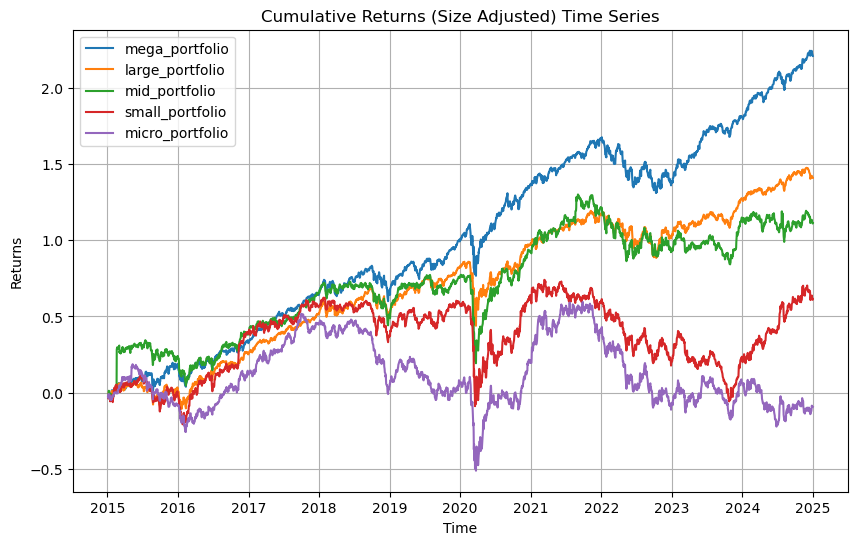

In [9]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(portfolios_df.cumsum(), label=portfolios_df.columns, alpha=1)

# Config
plt.title('Cumulative Returns (Size Adjusted) Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid()

# Show
plt.show()

In [10]:
# Analytics Table
size_analytics_table = calculate_analytics(portfolios_df)

size_analytics_table

,Annualized Returns,Annualized Volatility,Sharpe Ratio,Max Drawdown,VaR 95%
mega_portfolio,0.221636,0.201111,1.102057,-0.003653,-0.019324
large_portfolio,0.141323,0.186145,0.759208,-0.004203,-0.017600
mid_portfolio,0.111509,0.247632,0.450300,-0.005800,-0.022252
small_portfolio,0.061745,0.256378,0.240838,-0.007966,-0.023730
micro_portfolio,-0.009479,0.264096,-0.035892,-0.010272,-0.024803


In [11]:
# Calculate a primitive SMB premium
SMB_categories = (1/2*(portfolios_df['small_portfolio']+portfolios_df['micro_portfolio']) - 
       1/2*(portfolios_df['mega_portfolio']+portfolios_df['large_portfolio']))  

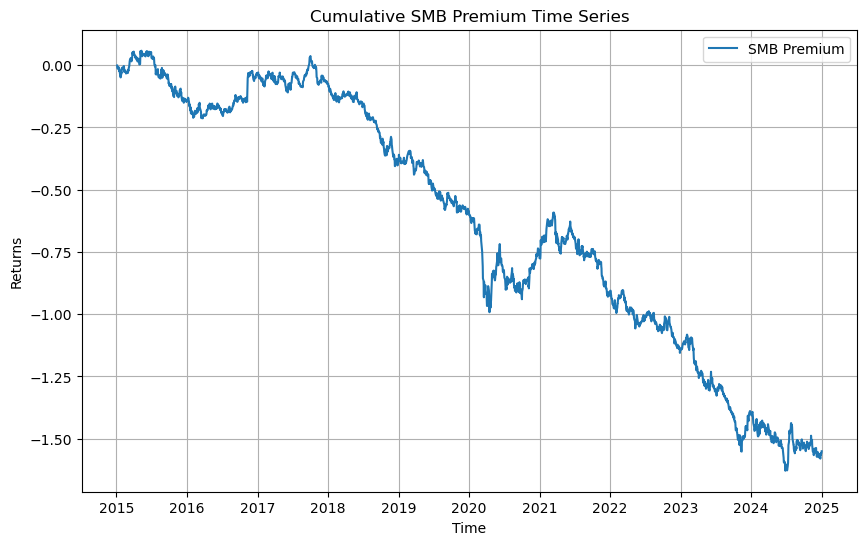

In [12]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(SMB_categories.cumsum(), label='SMB Premium', alpha=1)

# Config
plt.title('Cumulative SMB Premium Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid()

# Show
plt.show()

In [13]:
# Annualized Returns
annualized_returns = portfolios_df.mean() * 252 * 100
annualized_returns.name = 'annualized_returns'

annualized_returns

mega_portfolio     22.163596
large_portfolio    14.132254
mid_portfolio      11.150866
small_portfolio     6.174542
micro_portfolio    -0.947885
Name: annualized_returns, dtype: float64

In [14]:
# Annualized Volatility
annualized_volatility = portfolios_df.std() * np.sqrt(252) * 10
annualized_volatility.name = 'annualized_volatility'

annualized_volatility

mega_portfolio     2.011111
large_portfolio    1.861447
mid_portfolio      2.476317
small_portfolio    2.563777
micro_portfolio    2.640959
Name: annualized_volatility, dtype: float64

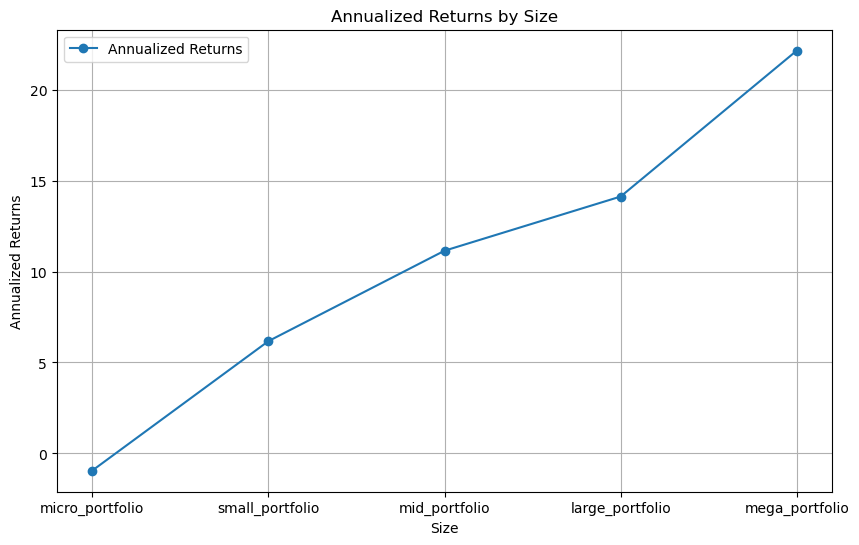

In [15]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(annualized_returns.iloc[::-1], label='Annualized Returns', alpha=1, marker='o')

# Config
plt.title('Annualized Returns by Size')
plt.xlabel('Size')
plt.ylabel('Annualized Returns')
plt.legend()
plt.grid()

# Show
plt.show()

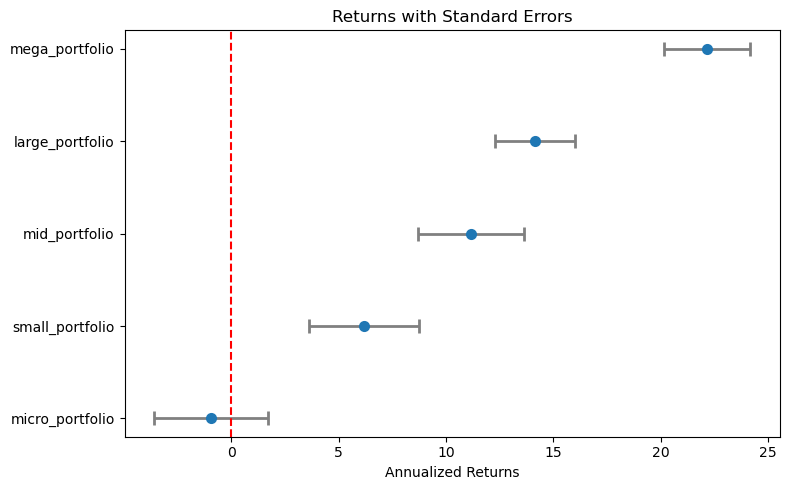

In [16]:
data = pd.DataFrame({
    'returns': annualized_returns.iloc[::-1],
    'volatility': annualized_volatility.iloc[::-1],
}, index=annualized_returns.iloc[::-1].index)

errors = data['volatility']

# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))

ax.errorbar(
    x=data['returns'],                # x-values (betas)
    y=range(len(data)),               # y-positions
    xerr=errors,                      # confidence interval errors
    fmt='o',                          # circular markers for betas
    ecolor='gray',                    # color of the error bars
    capsize=5,                        # small caps on error bars
    elinewidth=2,                     # thickness of the error bars
    markeredgewidth=2                 # thickness of the circle edge
)

# Customize the plot
ax.set_yticks(range(len(data)))
ax.set_yticklabels(data.index)
ax.axvline(0, color='red', linestyle='--')  # reference line
ax.set_xlabel('Annualized Returns')
ax.set_title('Returns with Standard Errors')

plt.tight_layout()
plt.show()

### Using ETFs to approximate SMB ###

In [17]:
# "VTV",  # LargeCap Value
# "VOE",  # MidCap Value
# "VBR",  # Small Cap Value
# "VV",   # LargeCap Blend
# "VO",   # MidCap Blend
# "VB",   # SmallCap Blend
# "VUG",  # LargeCap Growth
# "VOT",  # MidCap Growth
# "VBK"   # SmallCap Growth

# ":)"

In [18]:
tickers = get_tickers(mod="5.1")

tickers

['VTV', 'VOE', 'VBR', 'VV', 'VO', 'VB', 'VUG', 'VOT', 'VBK']

In [19]:
# Import data
df_returns = pd.DataFrame()

for ticker in tickers:
    df = get_market_data(
        ticker=ticker, 
        start_date='2015-01-01', 
        end_date='2025-01-01', 
        returns=True
    )
    
    returns = df['returns'].rename(ticker)
    
    df_returns = pd.concat([df_returns, returns], axis=1)

In [20]:
# Calculate the approximation of the HML prime
SMB_etfs = 1/3*(df_returns['VBR'] + df_returns['VB'] + df_returns['VBK']) - 1/3*(df_returns['VTV'] + df_returns['VV'] + df_returns['VUG'])

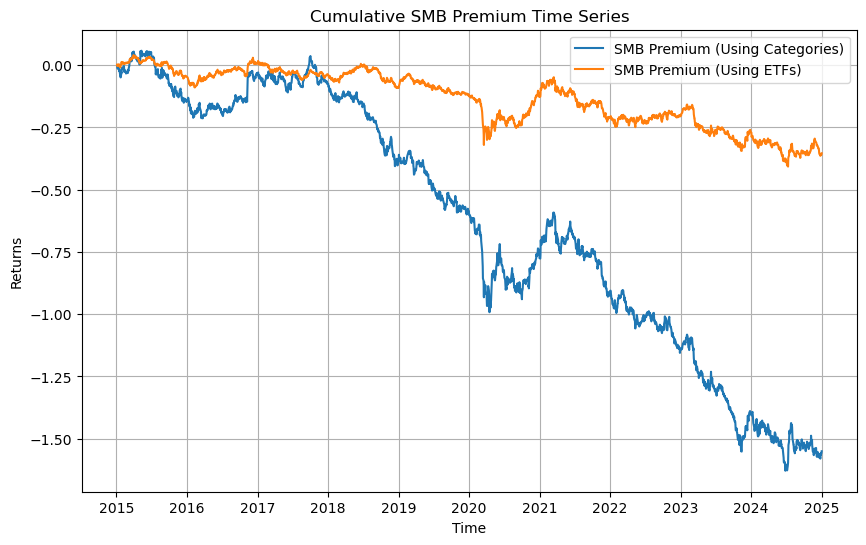

In [21]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(SMB_categories.cumsum(), label='SMB Premium (Using Categories)', alpha=1)
plt.plot(SMB_etfs.cumsum(), label='SMB Premium (Using ETFs)', alpha=1)

# Config
plt.title('Cumulative SMB Premium Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid()

# Show
plt.show()

In [22]:
# We can download the premiums in the Fama and French website
premiums_df = pd.read_csv(r'..\additional_data\famafrench_premiums.csv')
premiums_df.set_index('Date', inplace=True)
premiums_df.index = pd.to_datetime(premiums_df.index)
premiums_df.columns = ['mkt_premium', 'smb_premium', 'hml_premium', 'risk_free_rate']
premiums_df = premiums_df.div(100)

premiums_df

,mkt_premium,smb_premium,hml_premium,risk_free_rate
Date,,,,
2015-01-02,-0.0012,-0.0059,0.0012,0.00000
2015-01-05,-0.0184,0.0033,-0.0068,0.00000
2015-01-06,-0.0103,-0.0080,-0.0029,0.00000
2015-01-07,0.0119,0.0020,-0.0067,0.00000
2015-01-08,0.0181,-0.0012,-0.0029,0.00000
...,...,...,...,...
2025-03-25,0.0012,-0.0094,0.0005,0.00016
2025-03-26,-0.0122,-0.0048,0.0152,0.00016
2025-03-27,-0.0042,0.0019,0.0030,0.00016


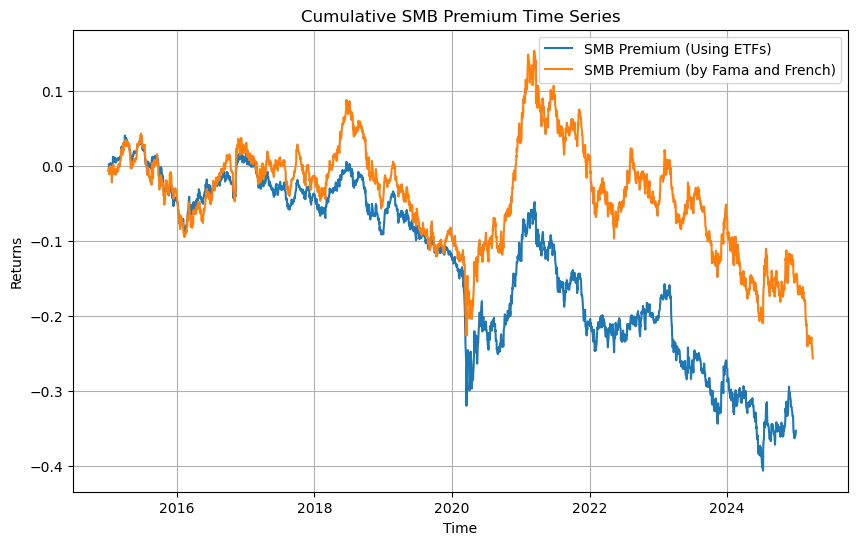

In [24]:
# Create Plot
plt.figure(figsize=(10, 6))
#plt.plot(SMB_categories.cumsum(), label='SMB Premium (Using Categories)', alpha=1)
plt.plot(SMB_etfs.cumsum(), label='SMB Premium (Using ETFs)', alpha=1)
plt.plot(premiums_df['smb_premium'].cumsum(), label='SMB Premium (by Fama and French)', alpha=1)

# Config
plt.title('Cumulative SMB Premium Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid()

# Show
plt.show()